# Отчет

# Первое практическое задание

# По предмету "Основы математического моделирования"

## Вариант №20

## Подготовила cтудентка 318 группы Милош Ольга

## Постановка задачи
Используя схему бегущего счета и итерационные методы, решить задачу:


\begin{equation}
 \left\{\begin{aligned}
& \frac{\partial u}{\partial t} -\frac{2ue^{u^{2}}}{1+e^{2u^{2}}}\frac{\partial u}{\partial x}= 0,&  -1<x \leq 0,\\
&u(x,0)=x^{2}+1,\\
& u(0,t)=e^{-t}.
\end{aligned} \right. \label{eq1}
\end{equation}

## Исследование задачи


### Исследование характеристик
Исследуем существование однозначного решения в области определения. Для этого составим уравнение характеристик и узнаем, будут ли пересекаться их проекции. Если проекции характеристик будут пересекаться, то может возникнуть физическая неоднозначность, и решение может быть неоднозначно.


Уравнение характеристик:
$$\frac{\text{d}t}{1}=-\frac{1+e^{2u^{2}}}{2ue^{u^{2}}}dx=\frac{\text{d}u}{\text{0}}$$

Проинтегрируем:

$$u=const=u(x_{0},t_{0})$$

и

$$\int_{t_{0}}^{t} \frac{\text{d}t}{1}=-\int_{x_{0}}^{x} \frac{1+e^{2u^{2}}}{2ue^{u^{2}}}dx$$

$$t-t_{0}=-\frac{1+e^{2u^{2}}}{2ue^{u^{2}}}(x-x_{0})$$




Воспользуемся начальным и граничным условиями для получения двух семейств кривых:

$$~~~~~~~~~~1)t_0=0:~~~~~t=-\frac{1+e^{2u(x_{0},0)^{2}}}{2u(x_{0},0)e^{u(x_{0},0)^{2}}}(x-x_{0})=-\frac{1+e^{2(x_{0}^{2}+1)^{2}}}{2(x_{0}^{2}+1)e^{(x_{0}^{2}+1)^{2}}}(x-x_{0})\\
2)x_0=0:~~~~~t=-\frac{1+e^{2u(0,t_{0})^{2}}}{2u(0,t_{0})e^{u(0,t_{0})^{2}}}x+t_{0}=-\frac{1+e^{2e^{-2t_{0}}}}{2e^{-t_{0}}e^{e^{-2t_{0}}}}x+t_{0}$$



Построим характеристики для $𝑡_{0}=0$ при различных $𝑥_{0}$:

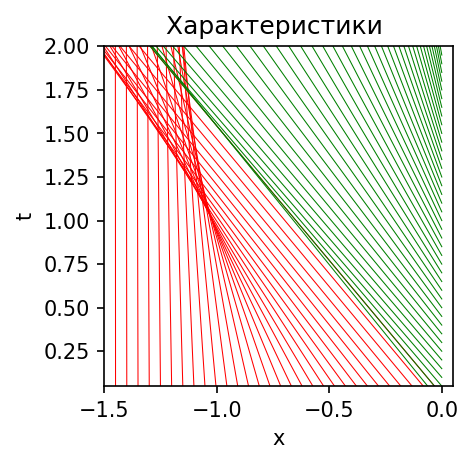

In [38]:
import matplotlib.pyplot as plt #импортируем библиотеки
import numpy as np

def q1(x): #характеристики
    return [-((1+np.exp(2*(x0**2+1)**2))/(2*(x0**2+1)*np.exp((x0**2+1)**2)))*(x-x0) for x0 in np.arange(-1.5,0.05,0.05)]

def q2(x):
    return [(-((1+np.exp(2*np.exp(-2*t0)))/(2*np.exp(-t0)*np.exp(np.exp(-2*t0))))*x+t0) for t0 in np.arange(-0.05,2,0.05)]

x_list = np.arange(-1.5,0.05, 0.1) 
q1_list = [q1(x) for x in x_list]
q2_list = [q2(x) for x in x_list]


plt.show()
fig, axes = plt.subplots(figsize=(3,3), dpi=150)
axes.plot(x_list, q1_list, 'r',linewidth=0.5)
axes.plot(x_list, q2_list, 'g',linewidth=0.5)
axes.set_xlabel('x')
axes.set_ylabel('t')
axes.set_title('Характеристики ')
plt.ylim([0.05,2])
plt.xlim([-1.5,0.05])




plt.show()


Видно, что на заданном полуинтервале $−1 < 𝑥 ≤ 0$ характеристики не пересекаются, следовательно, нет опрокидывания волны. Решение на нашем интервале определено однозначно.

Пересечение характеристик происходит в точке $(-1,1)$, но $x = -1$ не входит в область определения нашей задачи.

### Решение

В данном случае рассматривается начально-краевая задача для линейного однородного уравнения
переноса:

$$\frac{\partial u}{\partial t}+c(x,t)\frac{\partial u}{\partial x}=0$$

где функция 𝑐(𝑥,𝑡) представляет собой скорость переноса, а источники и стоки отсутствуют.
Будем рассматривать разностные схемы для уравнения переноса на равномерной сетке с шагом ℎ по переменной 𝑥 и шагом 𝜏 по переменной 𝑡:
$$x_{n} = nℎ; 𝑛 = 0,1, … , N\\
t_{m} = m𝜏; 𝑗 = 0,1, … ,M$$



Для решения задачи используется четырехточечный шаблон.
Разностная схема выглядит так:
$$\frac{y^{m+1}_n - y^m_{n} + y^{m+1}_{n+1} - y^m_{n+1}}{t} - c\frac{y^{m+1}_{n} - y^{m}_{n} + y^{m+1}_{n+1}- y^{m}_{n+1}}{h}=0$$

Данное разностное уравнение аппроксимирует уравнение переноса с погрешностью $O(τ^{2}+h^{2})$.


Перепишем поставленную задачу в дивергентном виде :
$$\frac{\partial u}{\partial t} +\frac{\partial(-\arctan(e^{u^{2}})) }{\partial x}= 0$$


Разностная схема в таком случае выглядит так:
$$\frac{y^{m+1}_n - y^m_{n} + y^{m+1}_{n+1} - y^m_{n+1}}{t} - c\frac{-\arctan(e^{y^{m+1}_{n}}) + \arctan(e^{y^{m}_{n}}) -\arctan(e^{y^{m+1}_{n+1}})+ \arctan(e^{y^{m}_{n+1}})}{h}=0$$


Уравнение относительно $y^{m+1}_{n+1}$ будем решать методом Ньютона:
$${y^{m+1}_{n+1}}^{(s+1)} = {y^{m+1}_{n+1}}^{(s)} - \frac{ f({y^{m+1}_{n+1}}^{(s)}) }  { f'({y^{m+1}_{n+1}}^{(s)}) }$$

До достижения заданной точности $ε$:

$$| {y^{m+1}_{n+1}}^{(s+1)} - {y^{m+1}_{n+1}}^{(s)} | \leq   ε $$

### Код

In [39]:

N, M =300, 300 # число x, t

Xstart, Tmax = 0, 0.9 # максимальное значение x,t

Xend, Tmin = -1, 0 # минимальное значение x,t

y = np.zeros((N,M), dtype=float) # двумерный массив, в котором будут храниться искомые значения
x = np.linspace(Xstart, Xend, N) # возвращает числа в указанном интервале с равным промежутком
t = np.linspace(Tmin, Tmax, M) 

h = (Xend-Xstart)/(N-1)# шаг по x
τ = (Tmax-Tmin)/(M-1) # шаг по t
ε = 0.001 # точность


y[0,:] = np.exp(-t) # граничные условия 
y[:,0] = x**2+1 # начальные условия 


In [40]:
def v(x):# для лаконичности определяем вспомогательные функции 
    return -np.arctan(np.exp(x**2))
def Dv(x):
    return -2.*x*np.exp(x**2)/(1.+np.exp(2.*x**2))
def f(x, a, b, c):
    return (b-a)/(2*τ)+(x-c)/(2*τ)+(v(x)-v(b)+v(c)-v(a))/(2*h)
def Df(x):
    return 1/(2*τ) + Dv(x)/(2*h)

def solution(a, b,c):# метод Ньютона
    g = a
    d = ε + 1
    while d > ε:
        y = g
        g = y - f(y,a,b,c)/(Df(y))
        d = abs(y-g)
    return g

for i in range(1, N):# вписываем в массив наши решения
    for j in range(1, M):
        y[i, j] = solution(y[i-1, j-1],y[i-1, j],y[i, j-1]) 

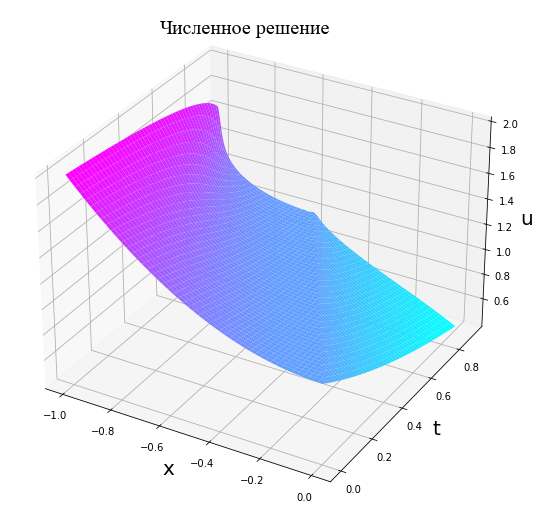

In [41]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
from matplotlib.pyplot import figure

fig = plt.figure(figsize=(20,20))
ax = fig.add_subplot(1,2,1, projection='3d')
t, x = np.meshgrid(t, x)

surf = ax.plot_surface(x, t, y, cmap='cool')

ax.text2D(0.30, .975, "Численное решение",
          verticalalignment='top',
          family='Times New Roman',
          fontsize=20,
          transform=plt.gca().transAxes)
ax.set_xlabel('x',fontsize=20)
ax.set_ylabel('t',fontsize=20)
ax.set_zlabel('u',fontsize=20)

plt.show()


### Исследование задачи на устойчивость

Поскольку в данной задаче скорость переноса $c(x,t) = \frac{-2ue^{u^{2}}}{1+e^{2u^{2}}}$ зависит от x и t, то воспользуемся спектральным критерием Неймана для определения условий устойчивости.
Выберем произвольную точку $(x_{0},t_{0})$ принадлежащую области определения и зафиксируем в ней $c(x_{0},t_{0}) = C$. 
 Исследуемая схема приобретает вид:
$$\frac{v^{m+1}_n - v^m_{n} + v^{m+1}_{n+1} - v^m_{n+1}}{t} - C\frac{v^{m+1}_{n} - v^{m}_{n} + v^{m+1}_{n+1}- v^{m}_{n+1}}{h}=0$$
Решение ищем в ввиде:
$$v^{m}_{n}=\lambda^{m}e^{i\alpha n}.$$
Подставив замену в уравнение, получим:
$$\lambda e^{i\alpha}-e^{i\alpha}+\lambda -1+\frac{C\tau}{h}(\lambda e^{i\alpha}- \lambda + e^{i\alpha}-1)=0$$

И для $\lambda$ :
$$\lambda = \frac{e^{i\alpha}+1+\frac{C\tau}{h}(1-e^{i\alpha})}{e^{i\alpha}+1+\frac{C\tau}{h}(e^{i\alpha}-1)},\\
|\lambda | = 1$$
Т.е. условие $|\lambda(\alpha)|\leq1$ справедливо для любых соотношений шагов по координате и времени, и, следовательно, спектральный критерий Неймана выполнен.

### Критерий Куранта(достаточный)


Перепишем исследуемую разностную схему, поставив для нее задачу в виде:
\begin{aligned}
\begin{cases}
\frac{v^{m+1}_{n+1}~~-~v^{m}_{n+1}~~+~v^{m+1}_{n}~~-~v^{m}_{n}}{\tau}~~+~C\frac{v^{m+1}_{n+1}~~-~v^{m+1}_{n}~~+~v^{m}_{n+1}~~-~v^{m}_{n}}{h}=ε  ^{m}_n,\\
v^{0}_n=\phi _n,\\
v^{m}_0=\mu ^{m}.
\end{cases}\end{aligned}

Преобразуем уравнение к виду:
\begin{aligned}
v^{m+1}_{n+1}(1+\frac{C\tau}{h})+v^{m+1}_n(1-\frac{C\tau}{h})=v^{m}_{n+1}(1-\frac{C\tau}{h})+v^{m}_n(1+\frac{C\tau}{h})+\tau ε^{m}_n,\end{aligned}
где $ε^{m}_n$ - некоторое возмущение исходной схемы.
Оценим данное соотношение по равномерной норме:
\begin{aligned}
\|v^{m+1}\|(1+\frac{C\tau}{h})+\|v^{m+1}\|(1-\frac{C\tau}{h}) \leq 
\|v^{m}\|(1-\frac{C\tau}{h})+\|v^{m}\|(1+\frac{C\tau}{h})+\tau \|ε ^{m}\|\notag\end{aligned}
\begin{aligned}
2\|v^{m+1}\|\leq 2\|v^{m}\| + \tau\|ε \|\end{aligned}

По индукции получаем:
\begin{aligned}
\| v^m\| \leq \|\phi\| + \frac{m\tau}{2}\|ε\|, \\
\| v^m\| \leq \|\phi\| + \frac{T}{2}\|ε\|.\end{aligned}
Переобозначая:
\begin{aligned}
\| v^m\| \leq \ M|\phi\| + N\|ε\|,\end{aligned}
где $T$ - величина интервала времени, на котором мы ищем решение, а $M$ и $N$ - константы, не зависящие от шагов сетки.
Таким образом получаем, что и критерий Куранта выполнен для рассматриваемой схемы для любых соотношений шагов по времени и координате, то есть фактически выполнено определение устойчивости.

Таким образом, исследуемая схема является безусловно устойчивой, согласно условиям Неймана и Куранта.